In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.express as pltpx

In [3]:
from google.colab import files
upload=files.upload()

Saving heart (1).csv to heart (1).csv


In [4]:
data= "/content/heart (1).csv"
df = pd.read_csv(data)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
corr = df.select_dtypes(include='number').corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

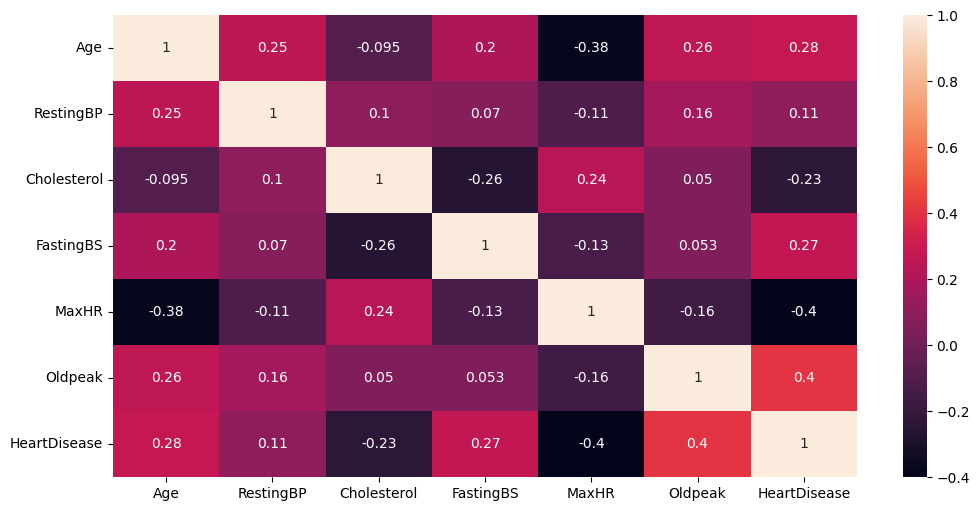

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

In [ ]:
# Create pie chart
fig = px.pie(df, values='HeartDisease', names='Sex', title='Gender differences in Heart Failure')
fig.show()

In [ ]:
pltpx.pie(df,values='HeartDisease',names='ChestPainType')

In [ ]:
pltpx.scatter(df,x='Age',y='RestingBP',color='Sex',color_discrete_map={'F':'red','M':'blue'},title="Age Vs. RestingBP")

In [ ]:
pltpx.scatter(df,x='Age',y='MaxHR',color='Sex',color_discrete_map={'F':'red','M':'blue'},title="Age Vs. MaxHR")

In [ ]:
pltpx.histogram(df,x='ChestPainType',color='Sex',title='Major types of Chest Pains')

In [ ]:
pltpx.histogram(df,x='RestingECG',color='Sex')

In [ ]:
pltpx.histogram(df,x='ST_Slope',color='Sex',title='Count Of ST_Slope')

In [ ]:
pltpx.histogram(df,x='Sex',color='HeartDisease',barmode='group',title='Distribution Of Sick And The Healthy')

In [ ]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [5]:
# One-hot encode categorical variables and data preprocessing
X = pd.get_dummies(df.drop('HeartDisease', axis=1))
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Model training
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [7]:
# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

In [10]:
print("Random Forest Evaluation:", evaluate_model(rf_model, X_test, y_test))
print("SVM Evaluation:", evaluate_model(svm_model, X_test, y_test))
print("KNN Evaluation:", evaluate_model(knn_model, X_test, y_test))
print("Logistic Regression Evaluation:", evaluate_model(lr_model, X_test, y_test))
print("Gradient Boosting Evaluation:", evaluate_model(gb_model, X_test, y_test))

Random Forest Evaluation: {'Accuracy': 0.8804347826086957, 'Precision': 0.912621359223301, 'Recall': 0.8785046728971962, 'F1 Score': 0.8952380952380954}
SVM Evaluation: {'Accuracy': 0.6902173913043478, 'Precision': 0.7604166666666666, 'Recall': 0.6822429906542056, 'F1 Score': 0.7192118226600985}
KNN Evaluation: {'Accuracy': 0.7065217391304348, 'Precision': 0.7731958762886598, 'Recall': 0.7009345794392523, 'F1 Score': 0.7352941176470589}
Logistic Regression Evaluation: {'Accuracy': 0.8532608695652174, 'Precision': 0.9, 'Recall': 0.8411214953271028, 'F1 Score': 0.8695652173913043}
Gradient Boosting Evaluation: {'Accuracy': 0.8804347826086957, 'Precision': 0.912621359223301, 'Recall': 0.8785046728971962, 'F1 Score': 0.8952380952380954}
